In [1]:
%load_ext autoreload
%autoreload 2

# Read train and Validation data

In [2]:
# import resources for handling dataset
from utils.LIPDataset import LIPDataset, RandomCrop, RandomHorizontalFlip, Resize, plot_data, ToTensor, Normalize
from torchvision import transforms
import torch




In [3]:
# param to normalize image (expected by pre-trained pytorch model)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [4]:
# read dataset and provide augmentation
# TRAIN DATA
train_transform = transforms.Compose([
                Resize((256, 256)),
                RandomCrop((224, 224)),
                RandomHorizontalFlip(),
                ToTensor(),
                Normalize(mean, std, False)
            ])

train_data = LIPDataset('dataset/train_data.ftr', 'dataset/train_set', train_transform)

In [5]:
# resource to display from dataset
from utils.LIPDataset import untransform_n_display

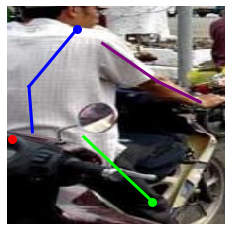

In [6]:
# visualize a sample
untransform_n_display(train_data, 4781 , mean, std, 2)

In [7]:
# VALIDATION DATA
val_transform = transforms.Compose([
                        Resize((224, 224)),
                        ToTensor(),
                        Normalize(mean, std)
                        ])

val_data = LIPDataset('dataset/val_data.ftr', 'dataset/val_set', val_transform)

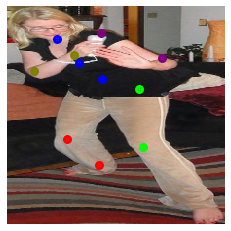

In [8]:
# visualize few sample
untransform_n_display(val_data, 7006, mean, std)

In [9]:
# length of both
len(train_data), len(val_data), train_data[5]['image'].size(), train_data[6]['keypoints'].size()

(30462, 10000, torch.Size([3, 224, 224]), torch.Size([32]))

## Dataloader and batch size

In [10]:
from torch.utils.data import DataLoader

In [11]:
batch_size = 8

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=4)

valid_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True, num_workers=4)

In [12]:
samples = next(iter(train_loader))

In [13]:
samples['keypoints'].size() # batches are formed

torch.Size([8, 32])

# Load model. Define lose function and optimizer

In [31]:
from utils.TrainModel import initialize_model

num_keypoints = 16
model = initialize_model(2*num_keypoints) 

In [15]:
model;

In [16]:
# define lose function 
from torch import nn
criterion = nn.MSELoss()


In [17]:
# define optimizer
from torch import optim
optimizer = optim.Adam(model.fc.parameters(), lr=0.0003)

# Training and tracking loss (train + valid)

In [18]:
from utils.TrainModel import TrainModel

In [19]:
trainModel = TrainModel(model, train_loader, valid_loader, nn.MSELoss, optim.Adam)

In [20]:
t_ls, v_ls = trainModel(epoch=2, eval_freq=400)

Epoch: 0, Batch: 0, Train Avg. Loss: 0.07923985189861721, Validation Avg. Loss:0.5996831701755524
Epoch: 1, Batch: 0, Train Avg. Loss: 0.06426576773325603, Validation Avg. Loss:0.8811800495147705
Training complete


In [19]:
torch.save(model.state_dict(), 'models/state_dict.pt')

## Testing on images

In [26]:
model.load_state_dict(torch.load('models/state_dict.pt'))

<All keys matched successfully>

In [21]:
from utils.TrainModel import random_test

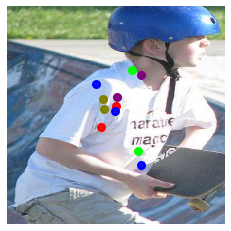

In [36]:
# %timeit 
sample, pred_pts = random_test(val_data, model, [mean, std], display=True)

In [52]:
# display actual 
# untransform_n_display([{'image':image, 'keypoints':actual_pts}], 0, mean, std)